In [18]:
import base64
import requests
import os
from mistralai import Mistral

def encode_image(image_path):
    """Encode the image to base64."""
    try:
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    except FileNotFoundError:
        print(f"Error: The file {image_path} was not found.")
        return None
    except Exception as e:  # Added general exception handling
        print(f"Error: {e}")
        return None

# Path to your image
image_path = "../data/WhatsApp Image 2024-10-12 à 12.50.36_fd30d4a3.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)

# Retrieve the API key from environment variables
api_key = os.environ["MISTRAL_API_KEY"]

# Specify model
model = "pixtral-12b-2409"

# Initialize the Mistral client
client = Mistral(api_key=api_key)

# Define the messages for the chat
messages = [

    {"role": "system",
     "content": """You are a helpful assistant that enables us to extract brand names using entity identification.
     Only return the brand name and with the type.
     output format must be respected in all calls:
     brand:descriptor
     descriptor is the definition description of the product which specific version of the product.
     """
        },{
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Extract the name of the brand."
            },
            {
                "type": "image_url",
                "image_url": f"data:image/jpeg;base64,{base64_image}" 
            }
        ]
    }
]

# Get the chat response
chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)

Le Pressoir du Pays Basque: Pomme Framboise


In [22]:
import os
import sys
from load_dotenv import load_dotenv

load_dotenv()
%load_ext autoreload
%autoreload 2
sys.path.append("../")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from utils import encode_image

image_path = "../data/WhatsApp Image 2024-10-12 à 12.50.36_fd30d4a3.jpg"
encoded_image = encode_image(image_path=image_path)

[{'role': 'system', 'content': 'You are a helpful assistant that enables us to extract brand names using entity identification.\n     Only return the brand name and with the type.\n     output format must be respected in all calls:\n     brand:descriptor\n     descriptor is the definition description of the product which specific version of the product.\n     '}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Extract the name of the brand.'}, {'type': 'image_url', 'image_url': ''}]}]

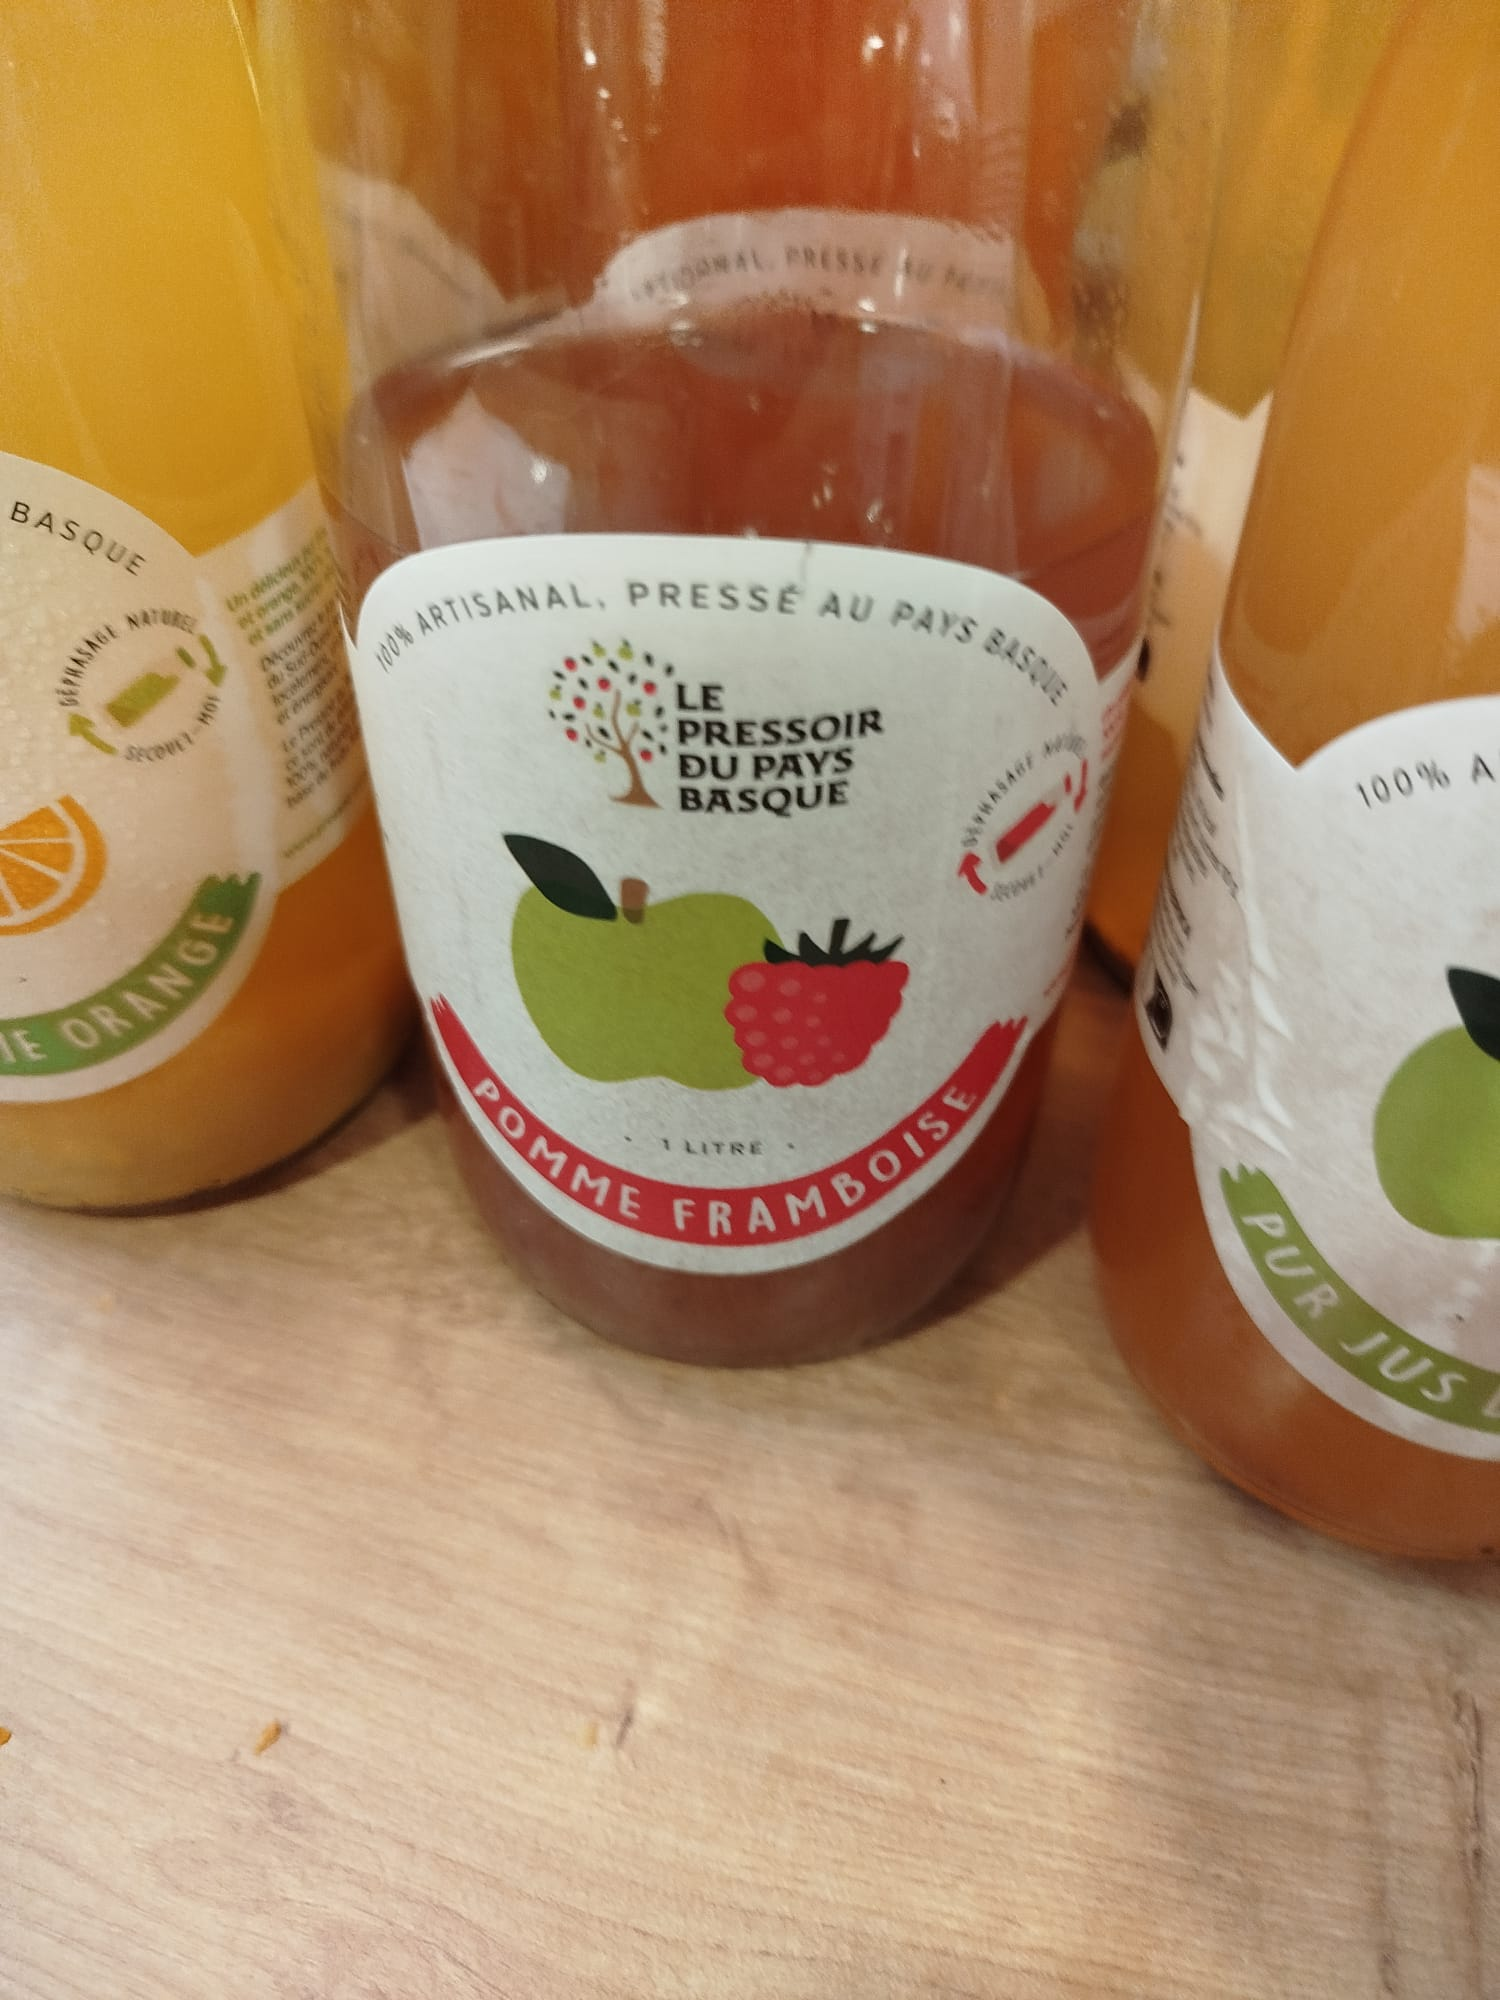

In [32]:
from pipelines.models_api import PROMPTS, mistral_call
from utils import encode_image

image_path = "../data/WhatsApp Image 2024-10-12 à 12.50.36_fd30d4a3.jpg"
encoded_image = encode_image(image_path=image_path)

chat_response, messages = mistral_call(text_input=PROMPTS.user_prompt_detection,
                                       base64_image=encoded_image)

In [33]:
chat_response

'Le pressoir du pays basque: Pomme framboise'

In [35]:
import os

os.listdir("../data/")

['WhatsApp Image 2024-10-12 à 12.50.36_fd30d4a3.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.37_638069ad.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_0305741d.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_2029e056.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_49e745aa.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_8fb6bb02.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_ac367551.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_c17eaf96.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_2594beb8.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_45bf90ec.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_55bdbfac.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_74c8e033.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_82fe15fa.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_d8dc207e.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.40_23b17632.jpg']

In [9]:
import os
from mistralai import Mistral

# Retrieve the API key from environment variables
api_key = os.environ["MISTRAL_API_KEY"]

# Specify model
model = "pixtral-12b-2409"

# Initialize the Mistral client
client = Mistral(api_key=api_key)

# Define the messages for the chat
messages = [
    {"role": "system", "content": """You are a helpful assistant that enables us to extract brand names using entity identification.
     Only return the brand name with no other extra phrases."""
        },{
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Extract the name of the brand."
            },
            {
                "type": "image_url",
                "image_url": "https://www.myamericanshop.com/cdn/shop/products/lucky-charms-cereals-065633132122-33662691836067.jpg?v=1704732897&width=800"
            }
        ]
    }
]

# Get the chat response
chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)


Lucky Charms


In [ ]:
import os
from mistralai import Mistral

# Retrieve the API key from environment variables
api_key = os.environ["MISTRAL_API_KEY"]

# Specify model
model = "pixtral-12b-2409"

# Initialize the Mistral client
client = Mistral(api_key=api_key)

# Define the messages for the chat
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "What's in this image?"
            },
            {
                "type": "image_url",
                "image_url": "https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg"
            }
        ]
    }
]

# Get the chat response
chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)


In [39]:
import requests

response = requests.get("https://api.api-ninjas.com/v1/nutrition")

In [74]:
import requests

#api_key = os.environ["NUTRITION_API_KEY"]

api_key="0810284f59157f2b60bb03ba10334a04"  
app_id = "b9f88a4d"

def natural_nutrients(query: str):
    url = 'https://trackapi.nutritionix.com/v2/natural/nutrients'
    headers = {
        'Content-Type': 'application/json',
        'x-app-id': app_id,
        'x-app-key': api_key
    }
    data = {'query': query
            }
    
    response = requests.post(url, json=data, headers=headers)
    return response

In [75]:
response = natural_nutrients("chocolate bar")
print(response)

<Response [200]>


In [76]:
print(response.content)

b'{"foods":[{"food_name":"chocolate bar","brand_name":null,"serving_qty":1,"serving_unit":"bar (1.55 oz)","serving_weight_grams":44,"nf_calories":235.4,"nf_total_fat":13.05,"nf_saturated_fat":8.14,"nf_cholesterol":10.12,"nf_sodium":34.76,"nf_total_carbohydrate":26.14,"nf_dietary_fiber":1.5,"nf_sugars":22.66,"nf_protein":3.37,"nf_potassium":163.68,"nf_p":91.52,"full_nutrients":[{"attr_id":203,"value":3.366},{"attr_id":204,"value":13.0504},{"attr_id":205,"value":26.136},{"attr_id":207,"value":0.7832},{"attr_id":208,"value":235.4},{"attr_id":221,"value":0},{"attr_id":255,"value":0.66},{"attr_id":262,"value":8.8},{"attr_id":263,"value":90.2},{"attr_id":268,"value":985.16},{"attr_id":269,"value":22.66},{"attr_id":291,"value":1.496},{"attr_id":301,"value":83.16},{"attr_id":303,"value":1.034},{"attr_id":304,"value":27.72},{"attr_id":305,"value":91.52},{"attr_id":306,"value":163.68},{"attr_id":307,"value":34.76},{"attr_id":309,"value":1.012},{"attr_id":312,"value":0.216},{"attr_id":313,"value"

In [1]:
import ast

# initializing string
test_string = '{"Nikhil" : 1, "Akshat" : 2, "Akash" : 3}'

# using ast.literal_eval()
# convert dictionary string to dictionary
res = ast.literal_eval(test_string)

# print result
print("The converted dictionary : " + str(res))

The converted dictionary : {'Nikhil': 1, 'Akshat': 2, 'Akash': 3}


In [2]:
res

{'Nikhil': 1, 'Akshat': 2, 'Akash': 3}

In [64]:
import json
def bytes_to_json():
    my_json = response.content.decode('utf8').replace("'", '"')
    data = json.loads(my_json)
    s = json.dumps(data, indent=4, sort_keys=True)
    return s

{"foods":[{"food_name":"banana","brand_name":null,"serving_qty":1,"serving_unit":"medium (7\" to 7-7/8\" long)","serving_weight_grams":118,"nf_calories":105.02,"nf_total_fat":0.39,"nf_saturated_fat":0.13,"nf_cholesterol":0,"nf_sodium":1.18,"nf_total_carbohydrate":26.95,"nf_dietary_fiber":3.07,"nf_sugars":14.43,"nf_protein":1.29,"nf_potassium":422.44,"nf_p":25.96,"full_nutrients":[{"attr_id":203,"value":1.2862},{"attr_id":204,"value":0.3894},{"attr_id":205,"value":26.9512},{"attr_id":207,"value":0.9676},{"attr_id":208,"value":105.02},{"attr_id":209,"value":6.3484},{"attr_id":210,"value":2.8202},{"attr_id":211,"value":5.8764},{"attr_id":212,"value":5.723},{"attr_id":213,"value":0},{"attr_id":214,"value":0.0118},{"attr_id":221,"value":0},{"attr_id":255,"value":88.3938},{"attr_id":262,"value":0},{"attr_id":263,"value":0},{"attr_id":268,"value":437.78},{"attr_id":269,"value":14.4314},{"attr_id":287,"value":0},{"attr_id":291,"value":3.068},{"attr_id":301,"value":5.9},{"attr_id":303,"value":0

In [68]:
my_json

'{"foods":[{"food_name":"banana","brand_name":null,"serving_qty":1,"serving_unit":"medium (7\\" to 7-7/8\\" long)","serving_weight_grams":118,"nf_calories":105.02,"nf_total_fat":0.39,"nf_saturated_fat":0.13,"nf_cholesterol":0,"nf_sodium":1.18,"nf_total_carbohydrate":26.95,"nf_dietary_fiber":3.07,"nf_sugars":14.43,"nf_protein":1.29,"nf_potassium":422.44,"nf_p":25.96,"full_nutrients":[{"attr_id":203,"value":1.2862},{"attr_id":204,"value":0.3894},{"attr_id":205,"value":26.9512},{"attr_id":207,"value":0.9676},{"attr_id":208,"value":105.02},{"attr_id":209,"value":6.3484},{"attr_id":210,"value":2.8202},{"attr_id":211,"value":5.8764},{"attr_id":212,"value":5.723},{"attr_id":213,"value":0},{"attr_id":214,"value":0.0118},{"attr_id":221,"value":0},{"attr_id":255,"value":88.3938},{"attr_id":262,"value":0},{"attr_id":263,"value":0},{"attr_id":268,"value":437.78},{"attr_id":269,"value":14.4314},{"attr_id":287,"value":0},{"attr_id":291,"value":3.068},{"attr_id":301,"value":5.9},{"attr_id":303,"value

In [78]:
# Load the JSON to a Python list & dump it back out as formatted JSON
data = json.loads(my_json)
s = json.dumps(data, indent=4, sort_keys=True)
print(s)

{
    "foods": [
        {
            "alt_measures": [
                {
                    "measure": "NLEA serving",
                    "qty": 1,
                    "seq": 8,
                    "serving_weight": 126
                },
                {
                    "measure": "extra large (9\" or longer)",
                    "qty": 1,
                    "seq": 7,
                    "serving_weight": 152
                },
                {
                    "measure": "large (8\" to 8-7/8\" long)",
                    "qty": 1,
                    "seq": 6,
                    "serving_weight": 136
                },
                {
                    "measure": "medium (7\" to 7-7/8\" long)",
                    "qty": 1,
                    "seq": 5,
                    "serving_weight": 118
                },
                {
                    "measure": "small (6\" to 6-7/8\" long)",
                    "qty": 1,
                    "seq": 4,
             

In [9]:
import openfoodfacts

def openfood_api(product_name: str,
                 user_agent="MyAwesomeApp/1.0"):
    # User-Agent is mandatory
    api = openfoodfacts.API(user_agent=user_agent)
    api_json = api.product.text_search(product_name)
    return api_json

In [11]:
product_info = openfood_api(product_name="Pom potes pomme nature")

In [264]:
len(product_info["products"][0:3])

3

In [14]:
product_info.keys()

dict_keys(['count', 'page', 'page_count', 'page_size', 'products', 'skip'])

In [16]:
len(product_info["products"])

20

In [17]:
for i in range(len(product_info["products"])):
    print(product_info["products"][i].keys())

dict_keys(['_id', '_keywords', 'abbreviated_product_name', 'abbreviated_product_name_fr', 'abbreviated_product_name_fr_imported', 'added_countries_tags', 'additives_n', 'additives_original_tags', 'additives_tags', 'allergens', 'allergens_from_ingredients', 'allergens_from_user', 'allergens_hierarchy', 'allergens_lc', 'allergens_tags', 'amino_acids_prev_tags', 'amino_acids_tags', 'brands', 'brands_imported', 'brands_tags', 'carbon_footprint_from_known_ingredients_debug', 'carbon_footprint_percent_of_known_ingredients', 'categories', 'categories_hierarchy', 'categories_imported', 'categories_lc', 'categories_old', 'categories_properties', 'categories_properties_tags', 'categories_tags', 'category_properties', 'checkers_tags', 'ciqual_food_name_tags', 'cities_tags', 'code', 'codes_tags', 'compared_to_category', 'complete', 'completed_t', 'completeness', 'conservation_conditions', 'conservation_conditions_fr', 'conservation_conditions_fr_imported', 'correctors_tags', 'countries', 'countrie

In [ ]:
[{"role": "user", "content": systerm_prompt+example1},
 {"role": "assitant", "content": answer},
 {"role": final_prompt}]

In [ ]:
product_info = {}
product_info["products"][0]

In [91]:
def extract_product_data(product_info):
    product_data = {}
    information = product_info["products"][0]
    for data_tag in ["url", "product_name", "additives_tags",
    "allergens_from_ingredients", "categories",
    "conservation_conditions", "image_front_url",
    "ingredients_hierarchy", "ingredients_non_nutritive_sweeteners_n",
    "ingredients_text", "nutriments", "nutrient_levels", "nutriscore",
    "nutrition_grade_fr", "nutrition_grade_fr", "origins", "product_name_fr",
    "serving_quantity"]:
        if data_tag!="serving_quantity":
            product_data[data_tag] = information[data_tag]
        else:
            product_data[data_tag] = information[data_tag]+information["serving_quantity_unit"]
    return product_data

In [216]:
product_data = extract_product_data(product_info)

In [96]:
import json
with open('../pipelines/example_json.json', 'w', encoding='utf-8') as outfile:
  json.dump(product_data, outfile, ensure_ascii=False, indent=4)


In [87]:
product_info["products"][0]["vitamins_tags"]

[]

In [41]:
description_product

"Aliments et boissons à base de végétaux, Aliments d'origine végétale, Aliments à base de fruits et de légumes, Desserts, Fruits et produits dérivés, Compotes, Compotes de pomme, Compotes pommes nature, Compotes à boire, Desserts de fruits, Compotes sans sucres"

In [98]:
import os
from mistralai import Mistral

# Retrieve the API key from environment variables
api_key = os.environ["MISTRAL_API_KEY"]

# Specify model
model = "mistral-large-latest"

# Initialize the Mistral client
client = Mistral(api_key=api_key)

# Define the messages for the chat
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Can you generate images or plots saved as images?"
            }
        ]
    }
]

# Get the chat response
chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)


I'm unable to generate images or plots directly. However, I can guide you on how to create them using various programming languages and libraries. For example, you can use Python with libraries like Matplotlib, Seaborn, or Plotly to generate and save plots as images.

Here's a simple example using Matplotlib in Python:

```python
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a line plot
plt.plot(x, y)

# Add titles and labels
plt.title('Sample Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Save the plot as an image
plt.savefig('line_plot.png')

# Display the plot (optional)
plt.show()
```

This code will create a line plot and save it as an image file named `line_plot.png` in the current directory. You can adapt this code to suit your specific needs. If you have any particular type of plot or image in mind, feel free to ask!


# web scraper/crawler

In [ ]:
from langchain_community.document_loaders import AsyncHtmlLoader

urls = []
loader = AsyncHtmlLoader(urls)
docs = loader.load()

In [217]:
output = openfood_api(product_name="Healthy Cookie")

In [6]:
import pandas as pd
import sys
sys.path.append("../")

from utils import load_json


In [12]:
from pipelines.product_data import return_alternatives

return_alternatives(product_type="Healthy Cookie")

[{'_id': '0048685000090', '_keywords': ['cookie', 'time', 'organic', 'maple', 'arrowroot', 'healthy'], 'added_countries_tags': [], 'additives_debug_tags': ['en-e307c-added', 'en-e170-removed', 'en-e307a-removed', 'en-e500-removed'], 'additives_n': 2, 'additives_old_n': 0, 'additives_old_tags': [], 'additives_original_tags': ['en:e306', 'en:e500ii'], 'additives_prev_original_tags': ['en:e307a', 'en:e500', 'en:e170'], 'additives_tags': ['en:e306', 'en:e500', 'en:e500ii'], 'allergens': '', 'allergens_from_ingredients': 'en:gluten', 'allergens_from_user': '(en) ', 'allergens_hierarchy': ['en:gluten'], 'allergens_tags': ['en:gluten'], 'amino_acids_prev_tags': [], 'amino_acids_tags': [], 'brands': 'Healthy Times', 'brands_debug_tags': [], 'brands_tags': ['healthy-times'], 'categories_properties': {}, 'categories_properties_tags': ['all-products', 'categories-unknown', 'agribalyse-food-code-unknown', 'agribalyse-proxy-food-code-unknown', 'ciqual-food-code-unknown', 'agribalyse-unknown'], 'cat

{'alternative_products': [{'_id': '0048685000090',
   '_keywords': ['cookie', 'time', 'organic', 'maple', 'arrowroot', 'healthy'],
   'added_countries_tags': [],
   'additives_debug_tags': ['en-e307c-added',
    'en-e170-removed',
    'en-e307a-removed',
    'en-e500-removed'],
   'additives_n': 2,
   'additives_old_n': 0,
   'additives_old_tags': [],
   'additives_original_tags': ['en:e306', 'en:e500ii'],
   'additives_prev_original_tags': ['en:e307a', 'en:e500', 'en:e170'],
   'additives_tags': ['en:e306', 'en:e500', 'en:e500ii'],
   'allergens': '',
   'allergens_from_ingredients': 'en:gluten',
   'allergens_from_user': '(en) ',
   'allergens_hierarchy': ['en:gluten'],
   'allergens_tags': ['en:gluten'],
   'amino_acids_prev_tags': [],
   'amino_acids_tags': [],
   'brands': 'Healthy Times',
   'brands_debug_tags': [],
   'brands_tags': ['healthy-times'],
   'categories_properties': {},
   'categories_properties_tags': ['all-products',
    'categories-unknown',
    'agribalyse-food-

In [ ]:

from pipelines.alternative_products import return_alternatives

return_alternatives(product_type="Healthy Cookie")

In [265]:
import pandas as pd
from utils import load_json
import sys
sys.path.append("../")

def select_subset(output):
    products = output["products"]
    data = pd.DataFrame.from_dict(products[0]["nutriments"], orient="index").T
    for i in range(1, len(products)):
        new_data = pd.DataFrame.from_dict(products[i]["nutriments"], orient="index").T
        data = pd.concat((data, new_data), axis=0).reset_index(drop=True)
    return data.filter(like="100g")
def filter_products(dataset):
    data.dropna(axis=1, inplace=True)
    dataset.sort_values(["carbohydrates_100g",
                         "sugars_100g","fat_100g", "saturated-fat_100g"], ascending=True, inplace=True)
    return dataset

def return_alternatives(product_type):
    product_info = openfood_api(product_type)
    product_data = extract_product_data(product_info)
    output_data = select_subset(product_data)
    filtered_data = filter_products(output_data)
    alternatives = list(filtered_data.index[0:3])
    return {"alternative_products": [product_info["products"][alt] for alt in alternatives]}
    
    

In [260]:
output_data = select_subset(output)

In [261]:
filter_products(output_data)

calcium_100g carbohydrates_100g cholesterol_100g energy-kcal_100g  \
3          NaN                  7              NaN       383.333333   
7          NaN          29.411765              NaN       388.235294   
6          NaN          32.876712              NaN       301.369863   
1          NaN               32.9              NaN              212   
2          NaN               38.5              NaN              484   
5          NaN          39.285714              NaN       321.428571   
4          NaN               50.8                0              282   
0          0.4                 70                0              500   
8          NaN                700              NaN             4500   

  energy_100g   fat_100g fiber_100g  \
3        1604          6   1.333333   
7        1624  23.529412   5.882353   
6        1261  24.657534  10.958904   
1         887       7.05       23.5   
2        2025         32        NaN   
5        1345   3.571429  14.285714   
4        1180       11.3       28.2   
0        2092         20         10   
8       18828        150        400   

  fruits-vegetables-legumes-estimate-from-ingredients_100g  \
3                                                NaN         
7                                                NaN         
6                                                NaN         
1                                          11.436632         
2                                                NaN         
5                                                NaN         
4                                                NaN         
0                                                  0         
8                                                NaN         

  fruits-vegetables-nuts-estimate-from-ingredients_100g iron_100g  ...  \
3                                                NaN          NaN  ...   
7                                                NaN          NaN  ...   
6                                                NaN          NaN  ...   
1                                          11.436632          NaN  ...   
2                                                NaN          NaN  ...   
5                                                NaN          NaN  ...   
4                                                NaN          NaN  ...   
0                                                  0        0.005  ...   
8                                                NaN          NaN  ...   

  sodium_100g sugars_100g trans-fat_100g vitamin-a_100g vitamin-b2_100g  \
3         NaN    6.333333            NaN            NaN             NaN   
7           0   23.529412            NaN            NaN             NaN   
6    0.493151   19.178082            NaN            NaN             NaN   
1      0.0235         4.7            NaN            NaN             NaN   
2        0.36        15.6            NaN            NaN             NaN   
5    0.446429   14.285714            NaN            NaN             NaN   
4      0.0282        5.64              0            NaN             NaN   
0      0.1778          25              0       0.000375          0.0004   
8         NaN         NaN            NaN            NaN             NaN   

  vitamin-c_100g vitamin-pp_100g zinc_100g nutrition-score-fr_100g  \
3            NaN             NaN       NaN                     NaN   
7            NaN             NaN       NaN                     NaN   
6            NaN             NaN       NaN                     NaN   
1            NaN             NaN       NaN                      -6   
2            NaN             NaN       NaN                     NaN   
5            NaN             NaN       NaN                     NaN   
4            NaN             NaN       NaN                      -4   
0              0          0.0045     0.004                     NaN   
8            NaN             NaN       NaN                     NaN   

  added-sugars_100g  
3               NaN  
7               NaN  
6               NaN 

In [252]:
clean_dataset(output_data)

In [247]:
# Build query string for numeric variables
df = output_data.copy()
thresholds = load_json("../pipelines/thresholds.json")

def filter_with_conditions():
    query_conditions = []

    for var, condition in thresholds.items():
        if var not in df.columns:
            continue
        elif var in ["nutrition-score-fr_100g", "nova-group_100g"]:
            continue  # Handle these separately
        threshold_value, operator = condition["value"], condition["operator"]
        # Ensure variable names with special characters are handled
        safe_var = f'`{var}`'
        query_conditions.append(f"{safe_var} {operator} {threshold_value}")

    # Combine conditions
    query_str = " & ".join(query_conditions)
    # Apply numeric filters
    filtered_df = df.query(query_str)

    filtered_df = filtered_df.reset_index(drop=True)
    return filtered_df


In [248]:
filter_with_conditions()

Empty DataFrame
Columns: [carbohydrates_100g, energy-kcal_100g, energy_100g, fat_100g, proteins_100g]
Index: []

In [235]:
index_products = df.sort_values(["carbohydrates_100g", "fat_100g"], ascending=True).index[0]

In [239]:
url_alternative = output["products"][index_products]["url"]
product_name = output["products"][index_products]["product_name"]

In [195]:
filtered_df

Empty DataFrame
Columns: [carbohydrates, carbohydrates_100g, carbohydrates_serving, carbohydrates_unit, carbohydrates_value, carbon-footprint-from-known-ingredients_100g, carbon-footprint-from-known-ingredients_product, carbon-footprint-from-known-ingredients_serving, energy, energy-kcal, energy-kcal_100g, energy-kcal_serving, energy-kcal_unit, energy-kcal_value, energy-kcal_value_computed, energy_100g, energy_serving, energy_unit, energy_value, fat, fat_100g, fat_serving, fat_unit, fat_value, fiber, fiber_100g, fiber_serving, fiber_unit, fiber_value, fruits-vegetables-legumes-estimate-from-ingredients_100g, fruits-vegetables-legumes-estimate-from-ingredients_serving, fruits-vegetables-nuts-estimate-from-ingredients_100g, fruits-vegetables-nuts-estimate-from-ingredients_serving, nova-group, nova-group_100g, nova-group_serving, nutrition-score-fr, nutrition-score-fr_100g, proteins, proteins_100g, proteins_serving, proteins_unit, proteins_value, salt, salt_100g, salt_serving, salt_unit, salt_value, saturated-fat, saturated-fat_100g, saturated-fat_serving, saturated-fat_unit, saturated-fat_value, sodium, sodium_100g, sodium_serving, sodium_unit, sodium_value, sugars, sugars_100g, sugars_serving, sugars_unit, sugars_value, alpha-linolenic-acid, alpha-linolenic-acid_100g, alpha-linolenic-acid_serving, alpha-linolenic-acid_unit, alpha-linolenic-acid_value, arachidic-acid, arachidic-acid_100g, arachidic-acid_serving, arachidic-acid_unit, arachidic-acid_value, calcium, calcium_100g, calcium_label, calcium_serving, calcium_unit, calcium_value, energy-kj, energy-kj_100g, energy-kj_serving, energy-kj_unit, energy-kj_value, energy-kj_value_computed, magnesium, magnesium_100g, magnesium_label, magnesium_serving, magnesium_unit, magnesium_value, pantothenic-acid, pantothenic-acid_100g, pantothenic-acid_label, pantothenic-acid_serving, pantothenic-acid_unit, pantothenic-acid_value, vitamin-b1, vitamin-b1_100g, vitamin-b1_label, ...]
Index: []

[0 rows x 224 columns]

In [164]:
output_data[(output_data["carbohydrates_100g"] <40)&()]

carbohydrates_100g energy-kcal_100g energy_100g fat_100g  \
4                6.6               45         186      1.9   

  fruits-vegetables-legumes-estimate-from-ingredients_100g  \
4                                                  0         

  fruits-vegetables-nuts-estimate-from-ingredients_100g nova-group_100g  \
4                                               16.7                  4   

  nutrition-score-fr_100g proteins_100g salt_100g saturated-fat_100g  \
4                      -1           0.9      0.02                0.4   

  sodium_100g sugars_100g  
4       0.008           0

{'carbohydrates_100g': 15,
 'sugars_100g': 5,
 'fat_100g': 3,
 'saturated-fat_100g': 1.5,
 'salt_100g': 0.3,
 'sodium_100g': 0.12,
 'energy-kcal_100g': 150,
 'energy_100g': 150,
 'proteins_100g': 5,
 'fiber_100g': 3,
 'fruits-vegetables-legumes-estimate-from-ingredients_100g': 40,
 'fruits-vegetables-nuts-estimate-from-ingredients_100g': 40,
 'nutrition-score-fr_100g': ['A', 'B'],
 'nova-group_100g': ['1', '2']}

In [165]:
output_data.columns

Index(['carbohydrates_100g', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'fruits-vegetables-legumes-estimate-from-ingredients_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nova-group_100g', 'nutrition-score-fr_100g', 'proteins_100g',
       'salt_100g', 'saturated-fat_100g', 'sodium_100g', 'sugars_100g'],
      dtype='object')

In [14]:
import requests
from pprint import pprint  # For pretty-printing JSON responses


In [24]:
import requests

# Define the API endpoint
url = "http://127.0.0.1:8000/process-image-url/"

# Image URL to send
image_url = "https://0f44eec5808b7046a3dcded730e63b6d.cdn.bubble.io/f1699082180696x262972333108581820/1666032328078x13602434742896242004-11-2023-08-16compote-pomme-fran%C3%A7aise-all%C3%A9g%C3%A9e-en-sucre-st-mamet-100g.webp"

# Prepare the JSON payload
payload = {"url": image_url}

# Send the POST request
response = requests.post(url, json=payload)

# Check the response status code
print(f"Status Code: {response.status_code}")

# Print the JSON response from the server
print(response.json())


Status Code: 404
{'detail': 'Not Found'}


In [25]:
import requests

# Define the API endpoint
url = "http://127.0.0.1:8000/verify_food/"

# Image URL to send
image_url = "https://0f44eec5808b7046a3dcded730e63b6d.cdn.bubble.io/f1699082180696x262972333108581820/1666032328078x13602434742896242004-11-2023-08-16compote-pomme-fran%C3%A7aise-all%C3%A9g%C3%A9e-en-sucre-st-mamet-100g.webp"

# Prepare the JSON payload
payload = {"image_path": image_url}

# Send the POST request
response = requests.post(url, json=payload)

# Check the response status code
print(f"Status Code: {response.status_code}")

# Print the JSON response from the server
print(response.json())


Status Code: 422
{'detail': [{'type': 'missing', 'loc': ['body', 'url'], 'msg': 'Field required', 'input': {'image_path': 'https://0f44eec5808b7046a3dcded730e63b6d.cdn.bubble.io/f1699082180696x262972333108581820/1666032328078x13602434742896242004-11-2023-08-16compote-pomme-fran%C3%A7aise-all%C3%A9g%C3%A9e-en-sucre-st-mamet-100g.webp'}}]}


In [23]:
from pipelines.product_data import return_alternatives

alternatives = return_alternatives(product_type="healthy cookie") 

In [25]:
alternatives["alternative_products"]

[{'url': 'https://world.openfoodfacts.org/product/0048685000090/organic-maple-arrowroot-cookies-healthy-times',
  'product_name': 'Organic Maple Arrowroot Cookies',
  'additives_tags': ['en:e306', 'en:e500', 'en:e500ii'],
  'allergens_from_ingredients': 'en:gluten',
  'categories': None,
  'conservation_conditions': None,
  'image_front_url': None,
  'ingredients_hierarchy': ['en:oat-flour',
   'en:cereal',
   'en:flour',
   'en:cereal-flour',
   'en:oat',
   'en:barley-flour',
   'en:barley',
   'en:cold-pressed-safflower-and-sunflower-oil',
   'en:evaporated-cane-juice',
   'en:sugarcane',
   'en:sugarcane-juice',
   'en:cane-sugar-syrup',
   'en:added-sugar',
   'en:disaccharide',
   'en:arrowroot',
   'en:starch',
   'en:unsulphured-molasses',
   'en:maple-syrup',
   'en:natural-flavouring',
   'en:flavouring',
   'en:e306',
   'en:e500ii',
   'en:e500',
   'en:e170i',
   'en:e170',
   'en:retinyl-palmitate',
   'en:vitamins',
   'en:vitamin-a',
   'en:e375',
   'en:electrolytic-ir

In [ ]:
brands, "url", product_name